<a href="https://colab.research.google.com/github/FELIPEIDDQD/Analise-de-Dados-marketing/blob/main/Analise_de_dados_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#abrindo os dados
marketing = pd.read_csv("/content/MKT.csv", sep = ",")

marketing.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#informação dos tipos de variaveis
marketing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
marketing.tail()

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


In [ ]:
#descrevendo Dados Estatiticos
marketing.describe()

,youtube,facebook,newspaper,sales
count,27.000000,27.000000,27.000000,27.000000
mean,30.151111,27.648889,24.271111,9.133333
std,17.223227,16.827415,14.806403,2.818052
min,0.840000,0.480000,2.520000,1.920000
25%,18.180000,13.920000,11.220000,7.500000
50%,30.120000,30.960000,24.600000,9.120000
75%,45.720000,41.940000,33.180000,11.400000
max,60.000000,56.400000,54.240000,13.920000


In [ ]:
#tirando o outliers do yotube pois o investimento era muito maior em relação ao outras categorias
marketing = marketing.query("youtube <= 60")
marketing.describe()


,youtube,facebook,newspaper,sales
count,27.000000,27.000000,27.000000,27.000000
mean,30.151111,27.648889,24.271111,9.133333
std,17.223227,16.827415,14.806403,2.818052
min,0.840000,0.480000,2.520000,1.920000
25%,18.180000,13.920000,11.220000,7.500000
50%,30.120000,30.960000,24.600000,9.120000
75%,45.720000,41.940000,33.180000,11.400000
max,60.000000,56.400000,54.240000,13.920000


In [ ]:
#instalando bliblioteca de vizualização de dados
!pip install plotly
!pip install cufflinks
!pip install chart-studio




import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects  as go
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
#descrição da media de investimento do facebook
fig = px.box(marketing,x="facebook")
fig.update_traces(line_color = "blue")

In [ ]:
#descrição da media de vendas
fig = px.box(marketing,x="sales")
fig.update_traces(line_color = "blue")

In [ ]:
#descrição da media de investimento do youtube
fig = px.box(marketing,x="youtube")
fig.update_traces(line_color = "blue")

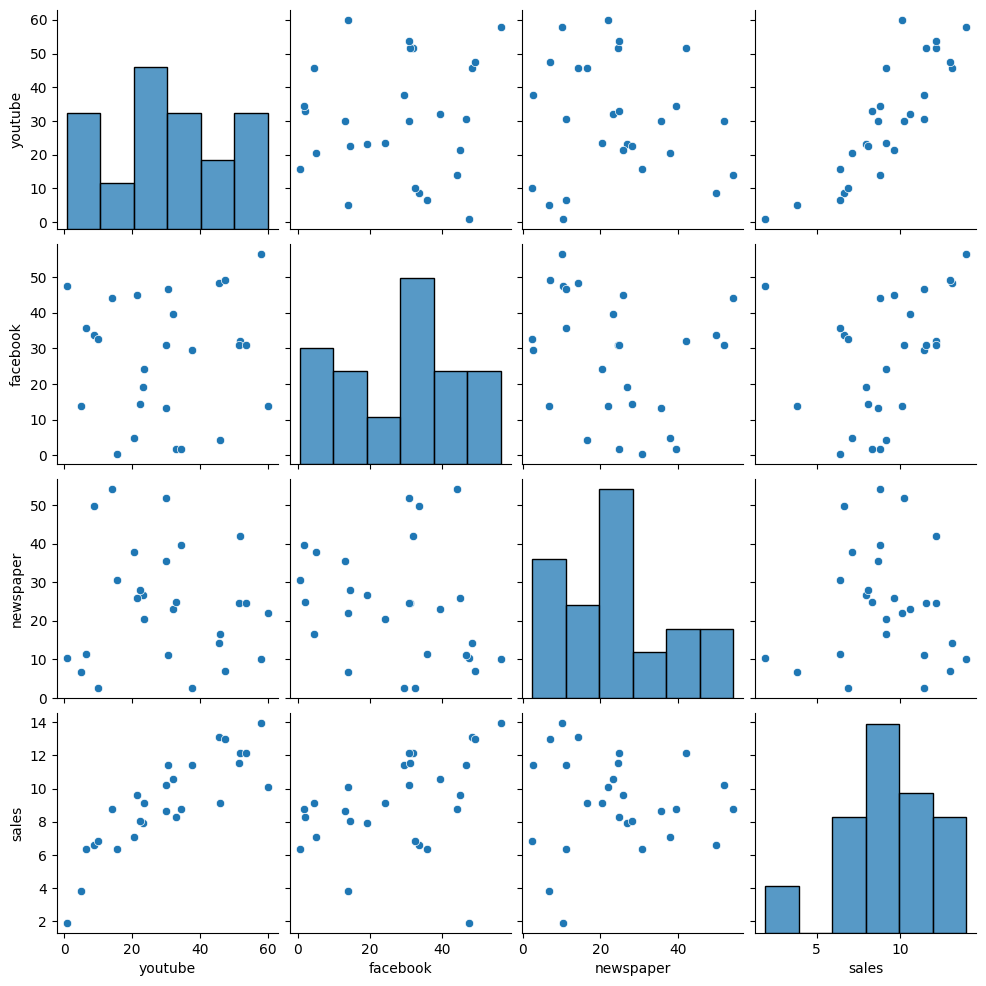

In [ ]:
#mesmo tirando o outliers podemos ver a diferença, o yotube tem mais retorno do investimento
import seaborn as sns
sns.pairplot(marketing)

In [ ]:
marketing.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

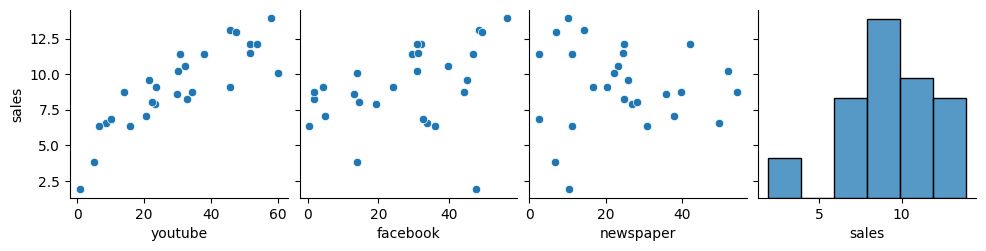

In [ ]:
#ja conseguimos ver um linha de tendencia, para o facebook e yotube,assim como os valores de retorno
sns.pairplot(marketing, x_vars= ['youtube', 'facebook', 'newspaper', 'sales'], y_vars="sales")



In [ ]:
marketing.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.072495,-0.065652,0.856368
facebook,0.072495,1.000000,-0.247079,0.369792
newspaper,-0.065652,-0.247079,1.000000,-0.029557
sales,0.856368,0.369792,-0.029557,1.000000


<Axes: >

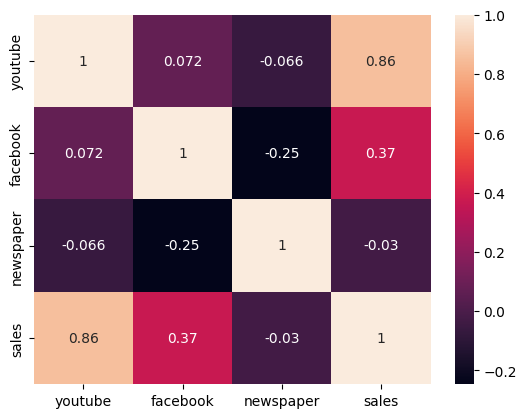

In [ ]:
#correlação
#aqui ja vemos que o retorno  do facebook e yotube são maiores que a do newspaper
sns.heatmap(marketing.corr(),annot=True)

<Axes: xlabel='sales', ylabel='Count'>

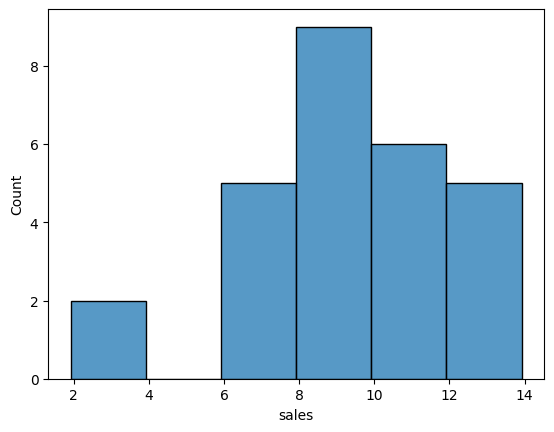

In [ ]:
sns.histplot(marketing["sales"])

In [ ]:
#importando bliblioteca de teste e de treino
from sklearn.model_selection import train_test_split

In [ ]:
marketing.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
#separandos os eixos
x = marketing[['youtube', 'facebook', 'newspaper', 'sales']]
y = marketing[["sales"]]

In [ ]:
x_train, x_test, Y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 42 )

In [ ]:
#testando
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(136, 4)
(35, 4)
(136, 1)
(35, 1)


In [ ]:
#bliblioteca de regreção
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,Y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)

In [ ]:
print("r_quadrado",r)

r_quadrado 1.0


In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'valores das vendas ')

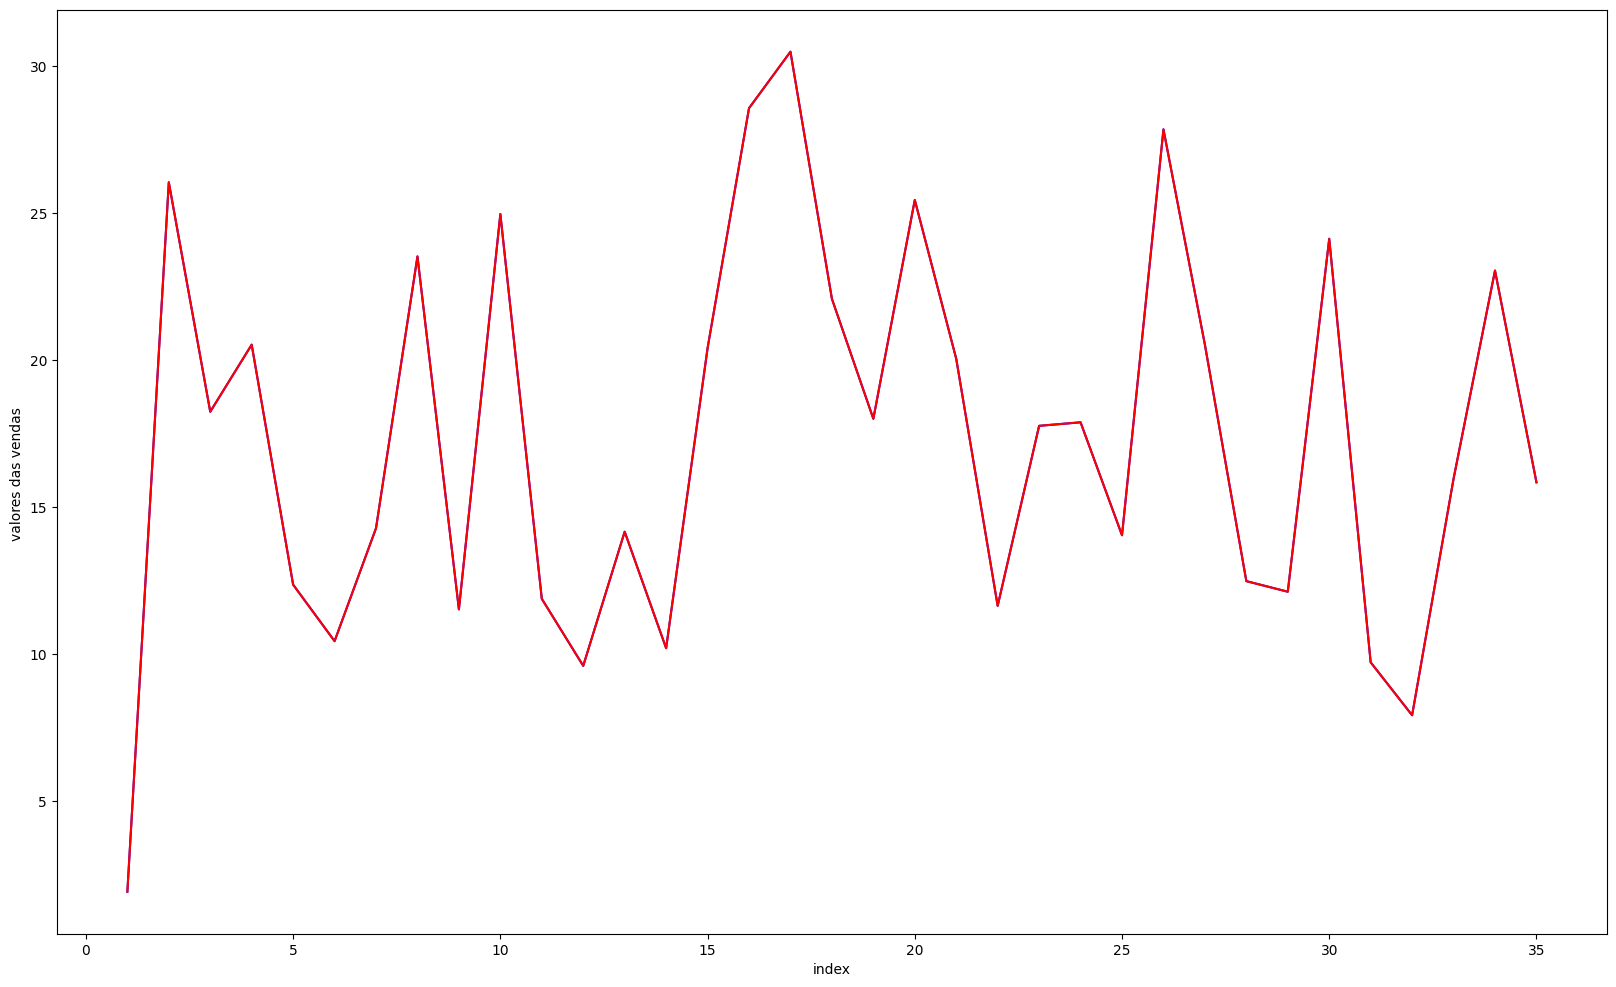

In [ ]:
# usando o random_state = 42, obtivemos uma predição perfeita, sobre o valores das vendas nas platafoma
c =[i for i in range(1,36,1)]
fig = plt.figure(figsize =(20,12))
plt.plot(c,y_test,color="blue")
plt.plot(c,y_pred,color = "red")
plt.xlabel("index")
plt.ylabel("valores das vendas ")


# **Podemos perceber que, a relação das vendas com as plataformas youtube e facebook, são maiores que a plataforma newspaper.Dito isso, podemos leva em conta a descontinuação do investimento nessa plataforma,e direcionar os recursos gastos na mesma, para investir nas outras 2 plataforma(youtube e facebook). com a analise preditiva podemos consirar as quedas de vendas com o mal investimento na plataforma newspaper
